## Vertical transport figure

In [2]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline

from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import sys
import xarray as xr
import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [3]:
sns.set_context('paper')
sns.set_style('white')

In [4]:
def plotCSPos(ax,CS1,CS2,CS3,CS4):
    ax.axvline(CS1,color='k',linestyle=':')
    ax.axvline(CS2,color='k',linestyle=':')
    ax.axvline(CS3,color='k',linestyle=':')
    ax.axvline(CS4,color='k',linestyle=':')
    
def unstagger_xarray(qty, index):
    """Interpolate u, v, or w component values to values at grid cell centres.
    
    Named indexing requires that input arrays are XArray DataArrays.

    :arg qty: u, v, or w component values
    :type qty: :py:class:`xarray.DataArray`
    
    :arg index: index name along which to centre
        (generally one of 'gridX', 'gridY', or 'depth')
    :type index: str

    :returns qty: u, v, or w component values at grid cell centres
    :rtype: :py:class:`xarray.DataArray`
    """
    
    qty = (qty + qty.shift(**{index: 1})) / 2
    
    return qty


In [5]:
#Exp
CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/gridGlob.nc' 
CGridOut = Dataset(CGrid)

CGridNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/gridGlob.nc' 
CGridNoCOut = Dataset(CGridNoC)

Ptracers = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/ptracersGlob.nc' 
PtracersOut = Dataset(Ptracers)

PtracersNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/ptracersGlob.nc' 
PtracersOutNoC = Dataset(PtracersNoC)

State = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/stateGlob.nc' 
StateNoC = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/stateGlob.nc' 

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

grid = xr.open_dataset(CGrid)

flux_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38/FluxTR01Glob.nc'
fluxNoC_file = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run42/FluxTR01Glob.nc'

flux = xr.open_dataset(flux_file)
fluxNoC = xr.open_dataset(fluxNoC_file)

In [6]:
# General input

nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 
numTr = 22 # number of tracers in total (CNT =22, 3D = 4, total = 19)

rc = CGridNoCOut.variables['RC']
dxf = CGridNoCOut.variables['dxF']
xc = rout.getField(CGridNoC, 'XC') # x coords tracer cells
yc = rout.getField(CGridNoC, 'YC') # y coords tracer cells

rA = rout.getField(CGridNoC, 'rA') 

drF = CGridNoCOut.variables['drF'] # vertical distance between faces
drC = CGridNoCOut.variables['drC'] # vertical distance between centers

hFacC = rout.getField(CGridNoC, 'HFacC')
mask_NoC = rout.getMask(CGridNoC, 'HFacC')



times = np.arange(0,nt,1)

#print(drC[:])
#print(np.shape(drC))

In [7]:
import canyon_records 
import nocanyon_records

records = canyon_records.main()
recordsNoC = nocanyon_records.main()

In [8]:
ii=0
for rec in records:
    print(ii,rec.name)
    ii=ii+1
    
select_rec=[11,1,12,3,13]
line_col = ['k','0.3','0.5','k', 'k']
line_sty = ['-','-','-','--',':']
labels = ['Base $\kappa_v$ bkg,\nhighest $\kappa_v$ cny',
          'Base',
          'Base $\kappa_v$ bkg,\nhigher $\kappa_v$ cny',
          'High $\kappa_v$ bkg',
          'Low $\kappa_v$ bkg,\nhighest $\kappa_v$ cny',
          ]

0 CNTDIFF_run43
1 CNTDIFF_run38
2 CNTDIFF_run37
3 CNTDIFF_run36
4 CNTDIFF_run45
5 CNTDIFF_run73
6 CNTDIFF_run75
7 CNTDIFF_run67
8 CNTDIFF_run51
9 CNTDIFF_run69
10 CNTDIFF_run71
11 3DVISC_run01
12 3DVISC_run02
13 3DVISC_run03
14 3DVISC_run04
15 LOW_BF_run01
16 LOWER_BF_run01


In [9]:
fileBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38advTracer_CS_transports.nc')
    
filedifBase = ('/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run38difTracer_CS_transports.nc')
    
dfcanBase = xr.open_dataset(fileBase)
dfdifBase = xr.open_dataset(filedifBase)
    
verticalBase = (dfdifBase.Vert_dif_trans_sb + dfcanBase.Vert_adv_trans_sb)  


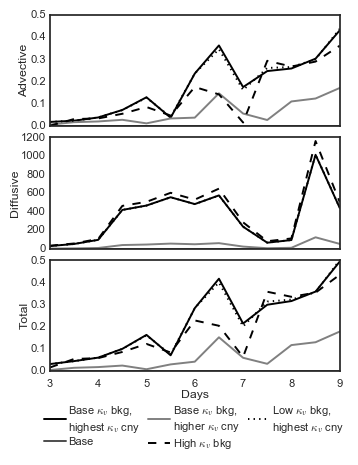

In [10]:
plt.rcParams['font.size'] = 8.0
f = plt.figure(figsize = (3.74,4.6)) # 95mm = 3.74 in, 115cm = 4.52in

gs = gspec.GridSpec(3, 1,hspace=0.1)

ax0 = plt.subplot(gs[0],xticks=[],yticks=[0,0.1,0.2,0.3,0.4,0.5])
ax1 = plt.subplot(gs[1],xticks=[])
ax2 = plt.subplot(gs[2],yticks=[0,0.1,0.2,0.3,0.4,0.5])

ii=0

# Time series

for ind in select_rec:

    file = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                records[ind].run_num))+
            'advTracer_CS_transports.nc')
    
    filedif = (('/ocean/kramosmu/MITgcm/TracerExperiments/%s/%s' %(records[ind].exp_code,
                                                                   records[ind].run_num))+
            'difTracer_CS_transports.nc')
    
    dfcan = xr.open_dataset(file)
    dfdif = xr.open_dataset(filedif)
    
    vertical = (dfdif.Vert_dif_trans_sb + dfcan.Vert_adv_trans_sb)  

    ax0.plot(np.arange(6,19,1)/2.0,(((dfcan.Vert_adv_trans_sb[5:].data-dfcanBase.Vert_adv_trans_sb[5:].data)**2)**(1/2))/
             (dfcanBase.Vert_adv_trans_sb[5:].data**2)**(1/2),
             linestyle=line_sty[ii],
             color=line_col[ii])
    ax1.plot(np.arange(6,19,1)/2.0,(((dfdif.Vert_dif_trans_sb[5:].data-dfdifBase.Vert_dif_trans_sb[5:].data)**2)**(1/2))/
             (dfdifBase.Vert_dif_trans_sb[5:].data**2)**(1/2),
             linestyle=line_sty[ii],
             color=line_col[ii])
    ax2.plot(np.arange(6,19,1)/2.0,(((vertical[5:].data-verticalBase[5:].data)**2)**(1/2))/(verticalBase[5:].data**2)**(1/2),
             linestyle=line_sty[ii],
             color=line_col[ii],
             label=labels[ii])
    ii=ii+1
    
    
ax2.set_xlabel('Days',labelpad=0.5)
ax0.set_ylabel('Advective',labelpad=0.5)
ax1.set_ylabel('Diffusive',labelpad=0.5)
ax2.set_ylabel('Total',labelpad=0.5)

ax0.set_ylim(0,0.5)   

ax2.legend(ncol=3,bbox_to_anchor=(1.05,-0.2),mode='extend',labelspacing=0.2,columnspacing=0.7,handletextpad=0.2)

ax0.tick_params(axis='x', pad=1)
ax1.tick_params(axis='x', pad=1)

ax0.tick_params(axis='y', pad=3)
ax1.tick_params(axis='y', pad=3)
ax2.tick_params(axis='y', pad=3)

plt.savefig('fig_vert_transport.eps',format='eps',bbox_inches='tight')
